In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from matplotlib.pylab import plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA 
from pandas.core.frame import DataFrame

## Question 1. 

Let's explore clustering models on an artificial data set with five features.

In [2]:
data1 = pd.read_csv('data/hw4data1.csv')
data1.head()

,1,2,3,4,5
0,0.624358,-0.007694,0.157510,0.440554,0.157423
1,-0.065098,-0.000790,0.271934,0.224854,0.158883
2,-0.086525,-0.280988,-0.025699,0.263920,0.421017
3,-0.581743,-0.275640,-0.290320,-0.213967,0.497857
4,0.170606,1.020045,-0.583633,0.887644,0.105641


#### a) First, guess the number of clusters we could have. 

#### b) Use K-means to cluster the original data based on your guess for the number of clusters. Report the resulting labels. 

#### c) Visualize the clustering result and color the points according to the labels obtained in part b). 

#### d) Justify your guess for k (the optimal number of clusters for K-means clustering) by first using silhouette_score and then the Elbow method on the original data. Briefly explain your approach. Are your results consistent? 

#### e) Using a Gaussian Mixture model instead of K-means (but with the same value for k), repeat parts b) and c). 

In [5]:
#PCA
pca_sk = PCA(n_components=2)  
newMat = pca_sk.fit_transform(data1) 
data2 = DataFrame(newMat)
data2.head()

,0,1
0,1.221680,1.390245
1,1.654341,0.893852
2,1.841078,1.076872
3,2.331021,0.713852
4,0.960973,0.339823


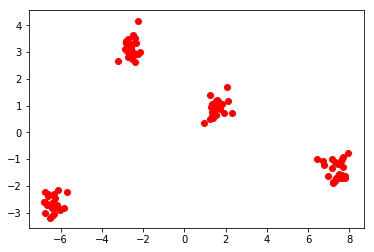

In [6]:
plt.scatter(data2[0],data2[1],c="r")
plt.show()

In [7]:
k=4
km=KMeans(random_state=324,n_clusters=k)
res=km.fit(data2)
print(res.labels_)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [3]:
#solution:
rr=KMeans(n_clusters=4).fit(data1)
rr.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

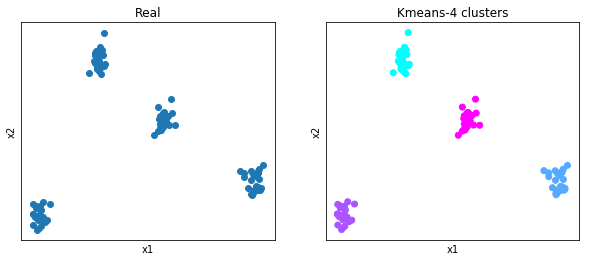

In [8]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)

plt.scatter(data2[0], data2[1], cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Real")

plt.subplot(1,2,2)
plt.scatter(data2[0], data2[1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(k))
plt.show()

In [9]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data2)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.595555597621
For n_clusters =3, the average silhouette_score is :0.762249337121
For n_clusters =4, the average silhouette_score is :0.901909648372
For n_clusters =5, the average silhouette_score is :0.782344408352


In [10]:
def silhouette_score_plot(data,range_n_clusters):
    X=data
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(10, 5)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=324)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)

        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[0], X[1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors)

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[0], centers[1],
                    marker='o', c="white", alpha=1, s=200)

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

        plt.show()

('For n_clusters =', 2, 'The average silhouette_score is :', 0.595555597621143)


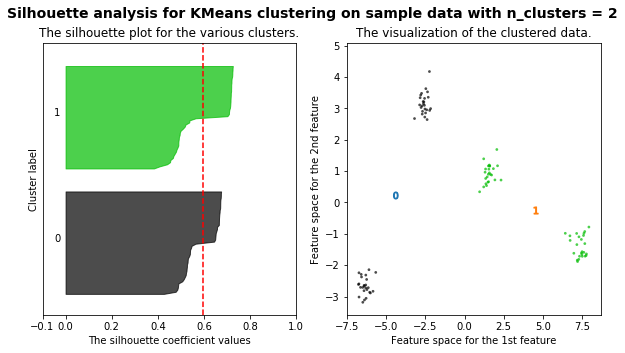

('For n_clusters =', 3, 'The average silhouette_score is :', 0.7622493371206528)


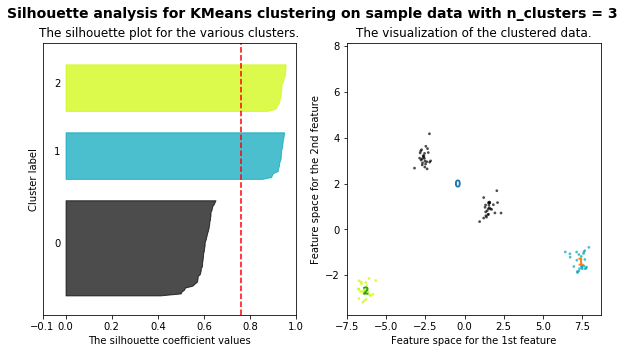

('For n_clusters =', 4, 'The average silhouette_score is :', 0.9019096483723884)


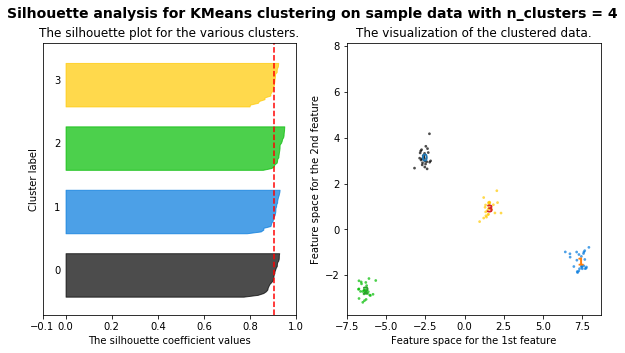

('For n_clusters =', 5, 'The average silhouette_score is :', 0.782344408352213)


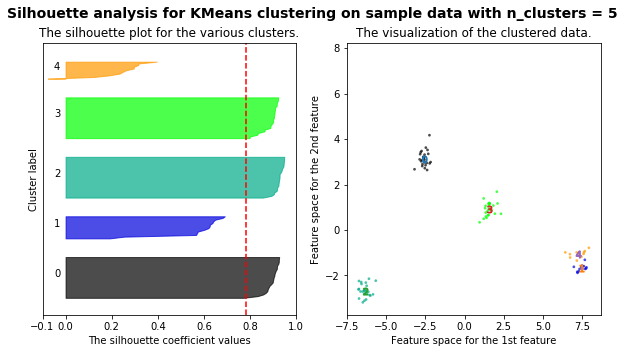

In [11]:
#plot
silhouette_score_plot(data2,range(2,6))

In [15]:
from scipy.spatial.distance import cdist, pdist
from sklearn.cluster import KMeans

def elbow(data,K):
#data is your input as numpy form
#K is a list of number of clusters you would like to show.
    # Run the KMeans model and save all the results for each number of clusters
    KM = [KMeans(n_clusters=k).fit(data) for k in K]
    
    # Save the centroids for each model with a increasing k
    centroids = [k.cluster_centers_ for k in KM]

    # For each k, get the distance between the data with each center. 
    D_k = [cdist(data, cent, 'euclidean') for cent in centroids]
    
    # But we only need the distance to the nearest centroid since we only calculate dist(x,ci) for its own cluster.
    globals()['dist'] = [np.min(D,axis=1) for D in D_k]
    
    # Calculate the Average SSE.
    avgWithinSS = [sum(d)/data.shape[0] for d in dist]
    
    
    # elbow curve
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, avgWithinSS, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for KMeans clustering')
    plt.show()
    
    
    # Total with-in sum of square plot. Another way to show the result.
    wcss = [sum(d**2) for d in dist]
    tss = sum(pdist(data)**2)/data.shape[0]
    bss = tss-wcss
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(K, bss/tss*100, 'b*-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Percentage of variance explained')
    plt.title('Elbow for KMeans clustering')
    plt.show()

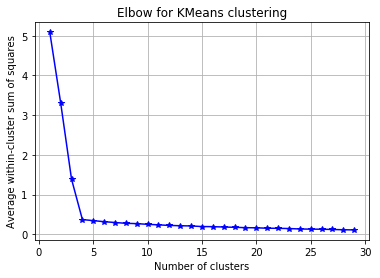

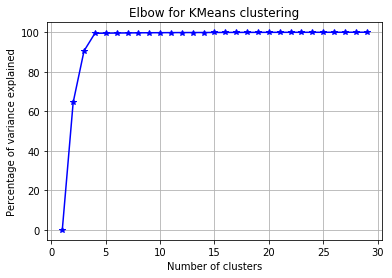

In [13]:
elbow(data2, range(1,30))

In [14]:
# Check Sklearn version.
import sklearn
sklearn.__version__

'0.20.3'

In [32]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=4,random_state=324)
res1=gm.fit(data2)

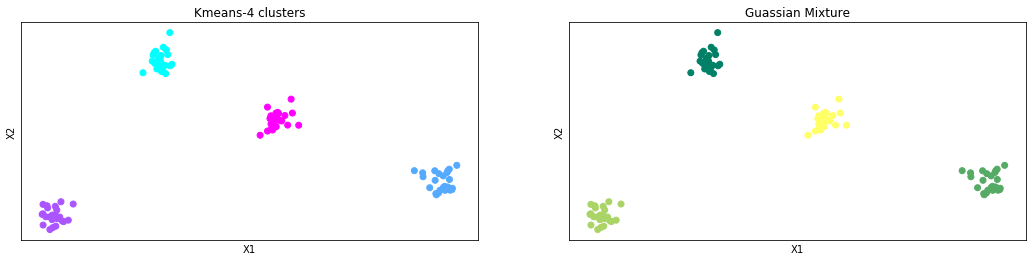

In [33]:
#Plot.
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
plt.scatter(data2[0], data2[1], c=res.labels_, cmap=plt.cm.cool)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-{} clusters".format(k))

plt.subplot(1,2,2)
plt.scatter(data2[0], data2[1], c=res1.predict(data2), cmap=plt.cm.summer)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()


## Question 2. 

The following data comes from a larger set detailing every motor vehicle collision in NYC (available [here](https://data.cityofnewyork.us/Public-Safety/NYPD-Motor-Vehicle-Collisions/h9gi-nx95)). This particular subset only considers collisions that occurred on October 31, 2017.

You have 680 collision records in the file ‘NYPD_Motor_Vehicle_Collisions_Duplicates.csv’, but you realize that some of these are actually duplicates resulting from a technical error. You know that there are over 600 unique records in the file, but you want to determine the exact number. Try k-means with 600-680 clusters applying Elbow method and analyzing Silhouette scores.

In [4]:
#DataFrame.fillna(),Fill NA/NaN values using the specified method.
data_duplication = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data_duplication.head()

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,UNIQUE KEY,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,10/31/2017,0:00,,,40.7331,-73.9548,"(40.733135, -73.954765)",MANHATTAN AVENUE,,,...,Unspecified,,,,3781862,PICK-UP TRUCK,PICK-UP TRUCK,,,
1,10/31/2017,0:00,,,40.7535,-73.8979,"(40.75351, -73.8979)",,,,...,Unspecified,,,,3781130,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,,,
2,10/31/2017,0:00,MANHATTAN,10036,40.7597,-73.9917,"(40.759727, -73.99169)",WEST 44 STREET,9 AVENUE,,...,,,,,3781009,PASSENGER VEHICLE,,,,
3,10/31/2017,0:00,BROOKLYN,11207,,,,LINDEN BOULEVARD,WILLIAMS AVENUE,,...,Unspecified,,,,3780501,PASSENGER VEHICLE,DS,,,
4,10/31/2017,0:00,MANHATTAN,10030,40.8156,-73.9435,"(40.81561, -73.943474)",,,2309 7 AVENUE,...,Unspecified,Unspecified,,,3780511,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,PASSENGER VEHICLE,,


#### a) Implement a clustering technique of your choice that will determine the exact number of unique records. (Hint: assigning each unique record to its own cluster would result in perfect clustering. Cluster the data\* based on possible values for the number of unique records and observe the results. ) Briefly explain your approach. 
\* You may first have to factorize the data set, as it contains string variables.

#### b) Confirm the number of unique records by using a more straightforward technique to identify duplicate rows. Pandas has a convenient function to drop duplicates for this purpose.  How well did your clustering technique perform?  

In [21]:
print(data_duplication.columns.values)

['DATE' 'TIME' 'BOROUGH' 'ZIP CODE' 'LATITUDE' 'LONGITUDE' 'LOCATION'
 'ON STREET NAME' 'CROSS STREET NAME' 'OFF STREET NAME'
 'NUMBER OF PERSONS INJURED' 'NUMBER OF PERSONS KILLED'
 'NUMBER OF PEDESTRIANS INJURED' 'NUMBER OF PEDESTRIANS KILLED'
 'NUMBER OF CYCLIST INJURED' 'NUMBER OF CYCLIST KILLED'
 'NUMBER OF MOTORIST INJURED' 'NUMBER OF MOTORIST KILLED'
 'CONTRIBUTING FACTOR VEHICLE 1' 'CONTRIBUTING FACTOR VEHICLE 2'
 'CONTRIBUTING FACTOR VEHICLE 3' 'CONTRIBUTING FACTOR VEHICLE 4'
 'CONTRIBUTING FACTOR VEHICLE 5' 'UNIQUE KEY' 'VEHICLE TYPE CODE 1'
 'VEHICLE TYPE CODE 2' 'VEHICLE TYPE CODE 3' 'VEHICLE TYPE CODE 4'
 'VEHICLE TYPE CODE 5']


In [22]:
data_duplication.dtypes

DATE                             object
TIME                             object
BOROUGH                          object
ZIP CODE                         object
LATITUDE                         object
LONGITUDE                        object
LOCATION                         object
ON STREET NAME                   object
CROSS STREET NAME                object
OFF STREET NAME                  object
NUMBER OF PERSONS INJURED         int64
NUMBER OF PERSONS KILLED          int64
NUMBER OF PEDESTRIANS INJURED     int64
NUMBER OF PEDESTRIANS KILLED      int64
NUMBER OF CYCLIST INJURED         int64
NUMBER OF CYCLIST KILLED          int64
NUMBER OF MOTORIST INJURED        int64
NUMBER OF MOTORIST KILLED         int64
CONTRIBUTING FACTOR VEHICLE 1    object
CONTRIBUTING FACTOR VEHICLE 2    object
CONTRIBUTING FACTOR VEHICLE 3    object
CONTRIBUTING FACTOR VEHICLE 4    object
CONTRIBUTING FACTOR VEHICLE 5    object
UNIQUE KEY                        int64
VEHICLE TYPE CODE 1              object


In [23]:
data_duplication[['DATE','TIME','BOROUGH','ZIP CODE','LATITUDE','LONGITUDE','LOCATION','ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']] = data_duplication[['DATE','TIME','BOROUGH','ZIP CODE','LATITUDE','LONGITUDE','LOCATION','ON STREET NAME','CROSS STREET NAME','OFF STREET NAME','CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 1','VEHICLE TYPE CODE 2','VEHICLE TYPE CODE 3','VEHICLE TYPE CODE 4','VEHICLE TYPE CODE 5']].stack().rank(method='dense').unstack()
print (data_duplication)

       DATE    TIME  BOROUGH  ZIP CODE  LATITUDE  LONGITUDE  LOCATION  \
0    1777.0  1767.0   1222.0    1222.0     835.0      210.0    1515.0   
1    1777.0  1767.0   1222.0    1222.0     898.0      352.0    1578.0   
2    1777.0  1767.0   2585.0    1113.0     926.0       95.0    1606.0   
3    1777.0  1767.0   2390.0    1155.0    1222.0     1222.0    1222.0   
4    1777.0  1767.0   2585.0    1109.0    1006.0      239.0    1687.0   
5    1777.0  1767.0   2638.0    1190.0     958.0      529.0    1638.0   
6    1777.0  1767.0   2638.0    1201.0    1222.0     1222.0    1222.0   
7    1777.0  1767.0   2386.0    1126.0    1024.0      281.0    1705.0   
8    1777.0  1767.0   2390.0    1163.0     721.0      109.0    1401.0   
9    1777.0  1767.0   2390.0    1159.0     789.0      255.0    1469.0   
10   1777.0  1767.0   2638.0    1205.0     733.0      519.0    1413.0   
11   1777.0  1767.0   1222.0    1222.0     835.0      210.0    1515.0   
12   1777.0  1768.0   1222.0    1222.0     638.0   

/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (618). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (619). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (620). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (621). Possibly due to duplicate points in X.
  return_n_iter=True)
/Use

/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (651). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (652). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (653). Possibly due to duplicate points in X.
  return_n_iter=True)
/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (617) found smaller than n_clusters (654). Possibly due to duplicate points in X.
  return_n_iter=True)
/Use

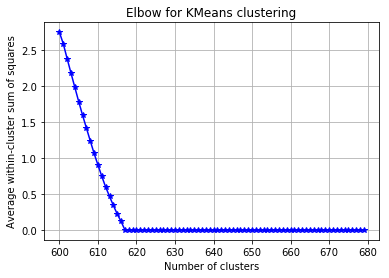

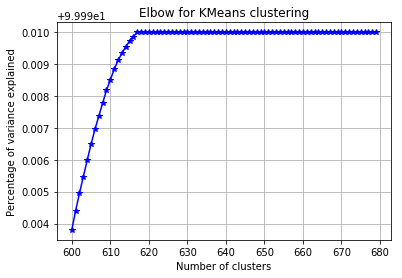

In [24]:
elbow(data_duplication, range(600,680))

There are 617 rows of unique data since when the number of clusters is 617, the average within-cluster sum of squares is 0, which means the 617 rows overlap with the centroids.

In [25]:
data = pd.read_csv('data/NYPD_Motor_Vehicle_Collisions_Duplicates.csv').fillna('')
data.drop_duplicates(keep = 'first', inplace = True) 
data.shape

(617, 29)

## Question 3.

### Real world exercise. 2012 "stop and frisk" data

https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City

The stop-question-and-frisk program, or stop-and-frisk, in New York City, is a practice of the New York City Police Department in which police officers stop and question a pedestrian, then frisk them for weapons and other contraband; this is what is known in other places in the United States as the Terry stop. The rules for stop, question, and frisk are found in the state's criminal procedure law section 140.50, and are based on the decision of the United States Supreme Court in the case of Terry v. Ohio. About 685,724 people were stopped in 2011. However, the number of stops has been reduced dramatically since then, to 22,939 in 2015.
Stop-and-frisk got increased attention in the 2016 presidential debate.

In [11]:
#load the data
data1=pd.read_csv("data/stop_2012.csv", index_col='zipcode')
data1.head()

,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,month_April,month_August,month_December,...,month_May,month_November,month_October,month_September,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,,,,,,,,,,,,,,,,
10472,278.0,212.0,315.0,213.0,254.0,234.0,241.0,158.0,95.0,142.0,...,104.0,96.0,110.0,123.0,349.0,35.0,57.0,206.0,437.0,663.0
10037,199.0,79.0,301.0,154.0,163.0,137.0,147.0,114.0,114.0,34.0,...,67.0,53.0,65.0,96.0,271.0,38.0,32.0,143.0,248.0,448.0
10460,278.0,169.0,283.0,203.0,234.0,197.0,289.0,117.0,133.0,91.0,...,95.0,86.0,148.0,175.0,462.0,51.0,56.0,190.0,411.0,483.0
11224,175.0,82.0,177.0,176.0,180.0,179.0,206.0,112.0,67.0,134.0,...,112.0,23.0,68.0,68.0,157.0,27.0,37.0,97.0,282.0,575.0
10456,979.0,647.0,1086.0,773.0,913.0,814.0,885.0,709.0,465.0,290.0,...,518.0,395.0,521.0,511.0,1295.0,137.0,110.0,662.0,1553.0,2340.0


In [12]:
#considering only the in-day timeline 
data1=data1.iloc[:,-6:]
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6
zipcode,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0
10037,271.0,38.0,32.0,143.0,248.0,448.0
10460,462.0,51.0,56.0,190.0,411.0,483.0
11224,157.0,27.0,37.0,97.0,282.0,575.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0


#### a) Find and visualize 5 zip codes with most stops

#### b) Filter the data to have at least 30 stop&frisk observations per zip code

#### c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k. 

#### d) Visualize the k-means clustering for the k you've chosen

#### e) Repeat d) using Guassian Mixture model

a) Find and visualize 5 zip codes with most stops

In [13]:
data1['Total'] = data1.apply(sum, axis=1)
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10472,349.0,35.0,57.0,206.0,437.0,663.0,1747.0
10037,271.0,38.0,32.0,143.0,248.0,448.0,1180.0
10460,462.0,51.0,56.0,190.0,411.0,483.0,1653.0
11224,157.0,27.0,37.0,97.0,282.0,575.0,1175.0
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0


In [14]:
data1.sort_values(by=['Total'],ascending=False,inplace=True)
data1.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [15]:
#visualization in scatter
pca_sk = PCA(n_components=2)  
newMat = pca_sk.fit_transform(data1) 
data2 = DataFrame(newMat)
data2.head(10)

,0,1
0,6115.797331,35.461968
1,4545.148062,243.529516
2,4191.147500,-168.200231
3,3775.814749,-170.020977
4,3398.247753,113.003351
5,3172.863683,-130.965403
6,3086.228951,-84.263284
7,2786.866116,336.558863
8,2683.108101,117.792527
9,2338.523814,-131.477432


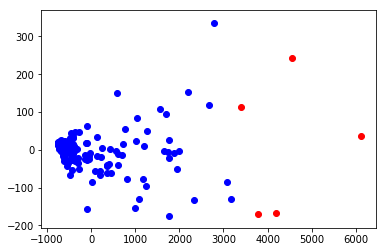

In [16]:
fig, ax = plt.subplots()
ax.scatter(data2.iloc[0:5, 0], data2.iloc[0:5, 1], c='r')
ax.scatter(data2.iloc[5:, 0], data2.iloc[5:, 1], c='b')

In [17]:
#visualization in map
import geopandas as gpd #geopandas
NY=gpd.read_file('data/NY.shp')
NY.head()

,zipcode,geometry
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...
2,11040.0,POLYGON Z ((-73.70098278625547 40.738895699230...
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...


In [18]:
NY=NY.merge(data1, how='left', left_on='zipcode', right_index=True)
NY.head()

,zipcode,geometry,time_1,time_2,time_3,time_4,time_5,time_6,Total
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...,67.0,30.0,17.0,57.0,108.0,89.0,368.0
1,11004.0,POLYGON Z ((-73.71068374074007 40.750040394509...,1.0,0.0,0.0,0.0,2.0,3.0,6.0
2,11040.0,POLYGON Z ((-73.70098278625547 40.738895699230...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11426.0,POLYGON Z ((-73.72270447144122 40.753733714383...,3.0,3.0,3.0,8.0,1.0,6.0,24.0
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...,35.0,1.0,12.0,32.0,57.0,101.0,238.0


In [19]:
NY.sort_values(by=['Total'],ascending=False,inplace=True)
NY.head()

,zipcode,geometry,time_1,time_2,time_3,time_4,time_5,time_6,Total
62,10456.0,POLYGON Z ((-73.91313620916213 40.839814109286...,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
75,10454.0,POLYGON Z ((-73.9317564471804 40.8079345777894...,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
30,11212.0,POLYGON Z ((-73.9029413249695 40.6708401090905...,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
144,11207.0,POLYGON Z ((-73.9036808841809 40.6904608744621...,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
178,11691.0,POLYGON Z ((-73.74690978489082 40.611725181962...,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


/Users/YushuRao/Documents/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


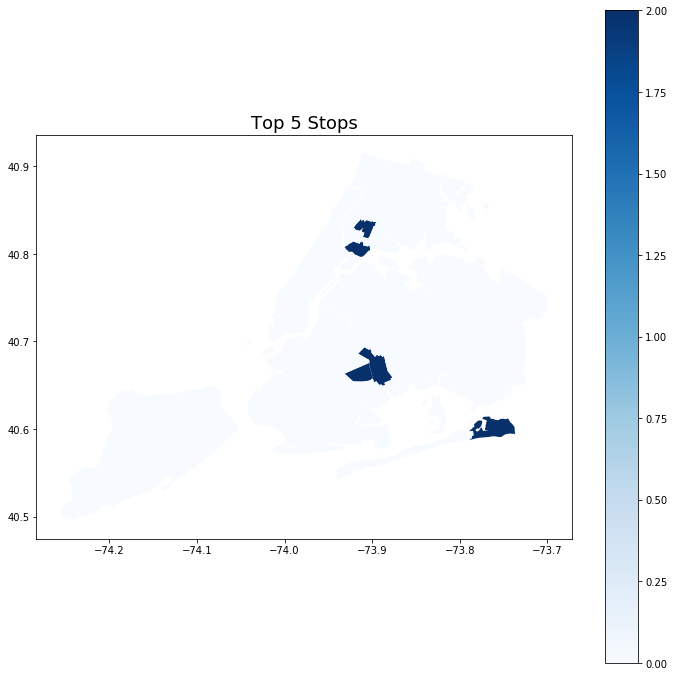

In [21]:
NY['Total_label']=0
NY.iloc[:5]['Total_label']=2

f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Top 5 Stops", fontsize=18)
NY.plot(axes=ax, column='Total_label',legend = True,cmap='Blues')

b) Filter the data to have at least 30 stop&frisk observations per zip code

In [22]:
ind=data1['Total']>30
data2=data1.loc[ind].copy()
data2.head()

,time_1,time_2,time_3,time_4,time_5,time_6,Total
zipcode,,,,,,,
10456,1295.0,137.0,110.0,662.0,1553.0,2340.0,6097.0
10454,929.0,56.0,94.0,411.0,1194.0,1979.0,4663.0
11212,751.0,48.0,199.0,709.0,1177.0,1549.0,4433.0
11207,905.0,70.0,212.0,575.0,852.0,1452.0,4066.0
11691,574.0,24.0,119.0,539.0,845.0,1571.0,3672.0


In [23]:
data2.shape

(155, 7)

c) We want to cluster the zip codes by the stops timeline data set. Choose the number of clusters k for Kmeans. Try both - Elbow method and Silhouette score - for that. In case the results are inconsistent provide reasoning for your choice of k.

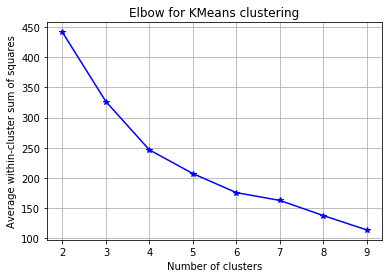

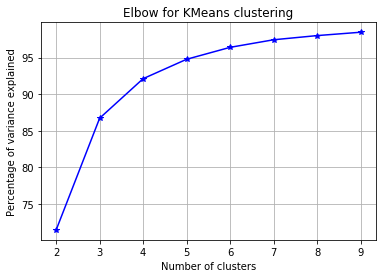

In [16]:
elbow(data2, range(2,10))

In [17]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters: #try different numbers of clusters
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(data2)
    #report average Silhouette score
    silhouette_avg = silhouette_score(data2, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.747528305576
For n_clusters =3, the average silhouette_score is :0.716979914264
For n_clusters =4, the average silhouette_score is :0.686618649983
For n_clusters =5, the average silhouette_score is :0.662771690797
For n_clusters =6, the average silhouette_score is :0.649884802071
For n_clusters =7, the average silhouette_score is :0.650197193657
For n_clusters =8, the average silhouette_score is :0.547334208293
For n_clusters =9, the average silhouette_score is :0.543096347429
For n_clusters =10, the average silhouette_score is :0.534060901836


In [25]:
#Choose k=2
km = KMeans(n_clusters=2, random_state=324)
cluster_labels = km.fit_predict(data2)
print(km.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


In [39]:
NY=gpd.read_file('data/NY.shp')
data2['label']=km.labels_
NY=NY.merge(data2, how='inner', left_on='zipcode', right_index=True)

In [40]:
NY

,zipcode,geometry,time_1,time_2,time_3,time_4,time_5,time_6,Total,label1,label
0,11372.0,POLYGON Z ((-73.86942457284175 40.749156870967...,67.0,30.0,17.0,57.0,108.0,89.0,368.0,2,0
4,11365.0,POLYGON Z ((-73.81088634744755 40.727171875759...,35.0,1.0,12.0,32.0,57.0,101.0,238.0,0,0
5,11373.0,POLYGON Z ((-73.88722098467157 40.727526187661...,65.0,12.0,31.0,67.0,42.0,92.0,309.0,0,0
7,11375.0,POLYGON Z ((-73.8562474640478 40.7367227854824...,13.0,3.0,7.0,5.0,12.0,14.0,54.0,0,0
9,11374.0,POLYGON Z ((-73.86451198956482 40.734071648417...,12.0,2.0,7.0,14.0,19.0,17.0,71.0,0,0
11,11423.0,POLYGON Z ((-73.77010678596534 40.731779208488...,64.0,11.0,28.0,46.0,54.0,72.0,275.0,0,0
12,11428.0,POLYGON Z ((-73.72774739596115 40.722584804748...,9.0,0.0,2.0,17.0,6.0,20.0,54.0,0,0
13,11432.0,POLYGON Z ((-73.80904031652176 40.719911623632...,63.0,12.0,11.0,208.0,254.0,73.0,621.0,2,0
14,11379.0,POLYGON Z ((-73.87190078471538 40.726857864410...,1.0,1.0,3.0,6.0,10.0,11.0,32.0,0,0
15,11429.0,POLYGON Z ((-73.72847847282661 40.720765574181...,54.0,3.0,13.0,26.0,74.0,125.0,295.0,0,0


d) Visualize the k-means clustering for the k you've chosen

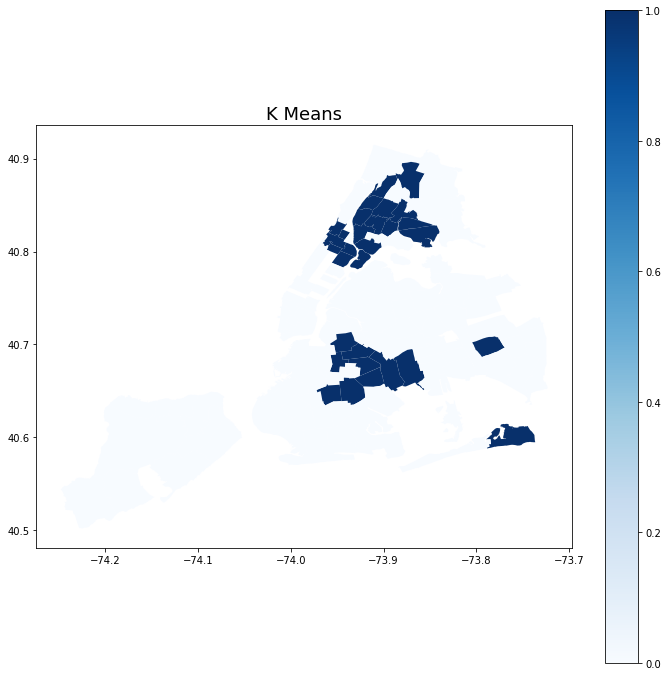

In [41]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("K Means", fontsize=18)
NY.plot(axes=ax, column='label',legend = True,cmap='Blues')

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0]


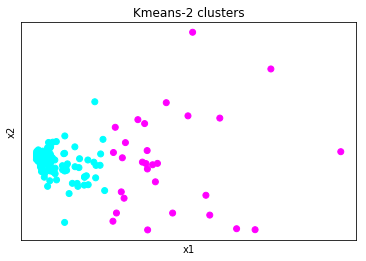

In [46]:
pca_sk = PCA(n_components=2)  
newMat = pca_sk.fit_transform(data2) 
data3 = DataFrame(newMat)
data3.head()

km = KMeans(n_clusters=2, random_state=324)
cluster_labels = km.fit_predict(data3)
print(km.labels_)

plt.subplot()
plt.scatter(data3[0], data3[1], c=km.labels_, cmap=plt.cm.cool)
plt.xlabel('x1')
plt.ylabel('x2')
plt.xticks(())
plt.yticks(())
plt.title("Kmeans-2 clusters")
plt.show()

e) Repeat d) using Guassian Mixture mode

In [48]:
from sklearn.mixture import GaussianMixture # You can import this only if you are using 0.18+ sklearn.
gm=GaussianMixture(n_components=2,random_state=324)
res1=gm.fit(data2)
c=res1.predict(data2)
c

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [49]:
NY=gpd.read_file('data/NY.shp')
data2['label1']=c
NY=NY.merge(data2, how='inner', left_on='zipcode', right_index=True)

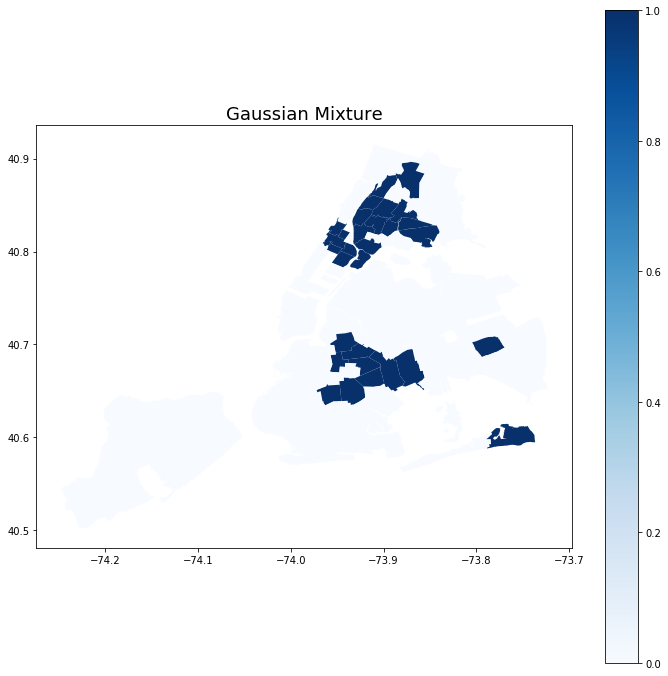

In [50]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax.set_title("Gaussian Mixture", fontsize=18)
NY.plot(axes=ax, column='label1',legend = True,cmap='Blues')

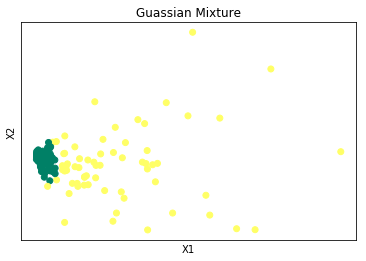

In [52]:
pca_sk = PCA(n_components=2)  
newMat = pca_sk.fit_transform(data2) 
data4 = DataFrame(newMat)
data4.head()

gm=GaussianMixture(n_components=2,random_state=324)
res1=gm.fit(data4)


plt.subplot()
plt.scatter(data4[0], data4[1], c=res1.predict(data4), cmap=plt.cm.summer)
plt.xlabel('X1')
plt.ylabel('X2')
plt.xticks(())
plt.yticks(())
plt.title("Guassian Mixture")

plt.show()